In [9]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy 

# this allows plots to appear directly in the notebook
%matplotlib inline

## First, let's read in the data
Read in the data from a csv (comma separated values) file

## A little bit of pseudocode: 

** Reading in the individual rower data: **
- For each row in the spreadsheet:
    - Store the rower's name and five attributes
    - Append to an array that holds the data for all rowers

** Reading in the time trial data: **
- For each row in the spreadsheet:
    - Store the velocity and the names of the 8 rowers
    - Append to an array that holds the data for all time trials

## The Code:

In [10]:
# Methods to read in data

def readTimeData(data):
    timeData = []
    
    for entry in data:
        velocity = float(entry[0])
        rowers = []
        for i in range(4, 12):
            rowers.append(entry[i])
        entry = {'Velocity': velocity, 'Rowers': rowers}
        timeData.append(entry)
        
    return timeData

def readRowerData(data):
    rowerData = []
    
    for row in data:
        name = row[0]
        fortymin = int(row[1])
        onemin = int(row[2])
        repmax = int(row[3])
        maxwatt = int(row[4])
        weight = int(row[5])
        
        entry = {'Name': name, 'Forty Minute': fortymin, 'One Minute': onemin, \
                 'Rep Max': repmax, 'Max Watt': maxwatt, 'Weight': weight}
        rowerData.append(entry)
    
    return rowerData

## Here's what the individual rower data looks like:

In [11]:
# read rower value data
rowerdata = pd.read_csv('RowerInfo.csv', index_col=0)
rower_data = readRowerData(rowerdata.values)
rowerdata.head(17)

,Name,40 Minute Distance (meters),1 Minute Distance (meters),Rep Max (kg),Max Watt (watts),Weight (lbs)
1,Monahan,11173,344,259,676,154
2,Rivkin,10454,335,250,702,145
3,Ptucha,11106,356,338,812,154
4,Docter,10779,342,293,787,156
5,Blair,10708,346,323,796,154
6,Ross,11096,333,278,731,160
7,Murphy,10386,335,259,717,155
8,Hou,10780,350,320,791,154
9,Puttmann,10998,348,285,800,155
10,Smith,10591,328,262,615,155


## Here's what the time trial data looks like:

In [12]:
# read time trial data
timedata = pd.read_csv('Data.csv', index_col=0)
time_data = readTimeData(timedata.values)
timedata.head()


,Velocity,Seconds,Time,Distance,Stroke,7,6,5,4,3,2,Bow
1,5.5147,272,04:31.9,1500,Hou,Murphy,Ross,Blair,Docter,Ptucha,Rivkin,Monahan
2,5.4348,276,04:35.8,1500,Bartholomew,Mcgrattan,Grueterich,Simon,Solberg,Bae,Smith,Puttmann
3,5.5147,272,04:31.5,1500,Hou,Murphy,Ross,Blair,Docter,Ptucha,Bartholomew,Monahan
4,5.4152,277,04:37.4,1500,Rivkin,Mcgrattan,Grueterich,Simon,Solberg,Bae,Smith,Puttmann
5,5.5556,90,01:29.5,500,Hou,Murphy,Ross,Blair,Docter,Ptucha,Bartholomew,Monahan


## Now we need to find the averages of the 5 attributes for each boat:

## A little bit of pseudocode:
- Given the individual **rower data** and the **time trial data**:
- For each entry in the time trial data:
    - **Sums** of 5 attributes are set to 0
    - For each of 8 rowers in the lineup:
        - Find each of his individual attributes from the rower data and add it to the appropriate sum
    - Divide each sum by 8 to get **5 averages** 
    - Add the **averages** and their **respective velocity** to a new set of data

## The Code:

In [13]:
# Get boat averages for each of the five characteristics 

# Individual rower data and time trial data given as parameters
def getAverages(rowerData, timeData):
    
    num_rowers = 8.0
    averages = []
    
    for row in timeData:

        # Set sums of five attributes to 0
        forty_sum = 0
        one_sum = 0
        repmax_sum = 0
        watt_sum = 0
        weight_sum = 0
        
        for rower in row['Rowers']:
            for entry in rowerData:
                # Find the specific rower from the rower data
                if (rower == entry['Name']):
                    a = (entry['Forty Minute'])
                    b = (entry['One Minute'])
                    c = (entry['Rep Max'])
                    d = (entry['Max Watt'])
                    e = (entry['Weight'])
                    # Add their individual attribute values to the sums
                    forty_sum += a
                    one_sum += b
                    repmax_sum += c
                    watt_sum += d
                    weight_sum += e
        
        # Divide by 8 to calculate the average
        average = {'Velocity': row['Velocity'], \
                  'FortyAverage': forty_sum / num_rowers, \
                  'OneAverage': one_sum / num_rowers, \
                  'RepMaxAverage': repmax_sum / num_rowers, \
                  'WattAverage': watt_sum / num_rowers, \
                  'WeightAverage': weight_sum / num_rowers}
        
        averages.append(average)
        
    return averages

## Here's what the averages look like:

In [14]:
averages = getAverages(rower_data, time_data)
avg_data = pd.DataFrame(averages)
avg_data.head()

,FortyAverage,OneAverage,RepMaxAverage,Velocity,WattAverage,WeightAverage
0,10810.25,342.625,290.000,5.5147,751.500,154.000
1,10726.00,344.625,282.125,5.4348,748.500,155.375
2,10767.50,344.375,293.125,5.5147,756.625,155.500
3,10768.75,342.875,279.000,5.4152,743.375,153.875
4,10767.50,344.375,293.125,5.5556,756.625,155.500


## Normalize the Mean and Variance

Transform each column so that the mean is 0 and the variance is 1. We make this transformation to the data so that the attribute coefficients are weighted equally in the regression model.

$$ X = \frac{X - \mu}{\sigma} $$
$$ \mu = mean $$
$$ \sigma = variance $$

In [15]:
import numpy

def normalize(data):
    
    data_norm = (data - data.mean()) / (data.max() - data.min())
    
    return data_norm

## Here's what the data looks like now:

In [16]:
normal_data = normalize(avg_data)
normal_data.head() 

,FortyAverage,OneAverage,RepMaxAverage,Velocity,WattAverage,WeightAverage
0,0.323815,-0.166667,0.243017,0.381033,0.179021,-0.276471
1,-0.039332,0.500000,-0.108939,0.222847,0.095105,0.370588
2,0.139547,0.416667,0.382682,0.381033,0.322378,0.429412
3,0.144935,-0.083333,-0.248603,0.184043,-0.048252,-0.335294
4,0.139547,0.416667,0.382682,0.462008,0.322378,0.429412


## Now we can do the regression!

## Let's do it first with just one attribute:

The model would be given as follows using the least squares approach:

**Regression Equation:**

$$ y = a + bx $$

In our case, y is the predicted velocity, a is the intercept, b is the slope of the regression line, and x is the average of the selected attribute for the boat. 

The slope and intercept are calculated as follows:

$$ b = \frac{n * \sum{xy} - (\sum{x})(\sum{y})}{n * \sum{x^2} - (\sum{x})^2} $$

$$ a = \frac{\sum{y} - b * \sum{x}}{n} $$ 

where y is the velocity, x is the average of the attribute for the boat, and n is the number of entries. 

## Luckily, we have Python modules to calculate these values for us!

The one we are using for the regression is called **StatsModels**.


In the code below, we import the Python module and use the **Ordinary Least Squares (ols)** method built in the module.

The syntax of the method asks for the data in the format of **"dependent variable ~ independent variable(s)"**.

We fit the data using **fit()** and return the **parameters a and b**. 

In [23]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Velocity ~ FortyAverage', data=normal_data).fit()
lm.params

Intercept      -1.068590e-15
FortyAverage    3.902848e-01
dtype: float64

## Interpreting Model Coefficients

How do we interpret the FortyAverage coefficient ($b$)?
- A "unit" increase in the Forty Minute Average is **associated with** a 0.39 "unit" increase in Velocity.

How do we interpret the intercept ($a$)?
- This number is **extremely close to 0**, which makes sense, because the velocity should be 0 if the forty minute average for a boat is 0. 

## Multiple Linear Regression
Now that we understand how to perform a regression analysis using one attribute to predict the velocity, we can do it for all five. 

The regression equation now looks like this:

$$ y = \alpha + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + \beta_{5}x_5 $$ 

where **$y$** is the velocity, **$\alpha$** is the intercept, **$\beta_{1}, \beta_{2}, \beta_{3}, \beta_{4}, \beta_{5}$** are the five model coefficients, and **$x_1, x_2, x_3, x_4, x_5$** are the five average attribute values. 

The code here is the same as for the regression with one attribute, except now we include the data of all five attributes in the method arguments. 

We now have six return values: the intercept value and the coefficients for the five attributes. 

In [24]:
lm = smf.ols(formula='Velocity ~ FortyAverage + OneAverage + \
                    RepMaxAverage + WattAverage + WeightAverage', \
                     data=normal_data).fit()
lm.params


Intercept       -1.054712e-15
FortyAverage     1.415966e+00
OneAverage       9.149223e-01
RepMaxAverage    1.475126e-01
WattAverage     -1.470919e+00
WeightAverage   -6.232467e-02
dtype: float64

## How can we tell if our model is any good?
We can observe the **R Squared Value**. The R squared value is a statistical measure of how close the data are to the fitted regression line. 

However, R-squared cannot determine whether the coefficient estimates and predictions are biased, which is why you must assess the residual plots. R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!

Let's take a look at the summary of our model provided by the **StatsModel** package:

In [19]:
lm.rsquared
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Velocity   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.6885
Date:                Wed, 14 Oct 2015   Prob (F-statistic):              0.640
Time:                        12:09:30   Log-Likelihood:                -3.4980
No. Observations:                  20   AIC:                             19.00
Df Residuals:                      14   BIC:                             24.97
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept     -1.055e-15      0.077  -1.37e-14      1.000        -0.165     0.165
FortyAverage      1.4160     11.718      0.121      0.906       -23.717    26.549
OneAverage        0.9149      4.498      0.203      0.842        -8.732    10.562
RepMaxAverage     0.1475      6.385      0.023      0.982       -13.546    13.841
WattAverage      -1.4709     21.425     -0.069      0.946       -47.423    44.481
WeightAverage    -0.0623      2.550     -0.024      0.981        -5.532     5.407
==============================================================================
Omnibus:                        1.744   Durbin-Watson:                   3.107
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.216
Skew:                          -0.356   Prob(JB):                        0.545
Kurtosis:                       2.025   Cond. No.                         334.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scatter Plot of Fit vs. Data

A visual method of checking the accuracy of our regression model is to make a scatter plot of the **predicted** velocity values of the model vs. the **actual** velocity given the same average values.

We can use the Python library **matplotlib** (which is adapted from Matlab) to make the plots.  

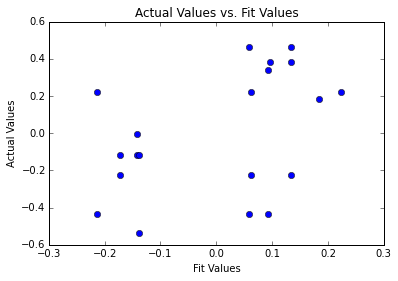

In [20]:
# Find the fit values

fit_values = []
data_values = []

for nd in normal_data.values:
    
    data_values.append(nd[3])
    
    fit_value = nd[0]*lm.params.FortyAverage + \
                nd[1]*lm.params.OneAverage + \
                nd[2]*lm.params.RepMaxAverage + \
                nd[4]*lm.params.WattAverage + \
                nd[5]*lm.params.WeightAverage + \
                lm.params.Intercept
                
    fit_values.append(fit_value)

figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)
axes.plot(fit_values, data_values, 'bo')
axes.set_title('Actual Values vs. Fit Values')
axes.set_xlabel('Fit Values')
axes.set_ylabel('Actual Values')

This scatterplot doesn't seem to yield the best results. Let's see if we can refine the regression model by looking to see if any of our attributes correlate with one another in order to see if make more precise our regression model. 

## Colinearity: FortyAverage vs. WattAverage

We see from the graph below that two of our attributes, FortyAverage and WattAverage, correlate pretty well, meaning that the higher the WattAverage, the higher the FortyAverage. 

We also note from the results of our regression above, FortyAverage and WattAverage have coefficients that are **equal** and **opposite**. This result indicates that these features are **colinear**. 

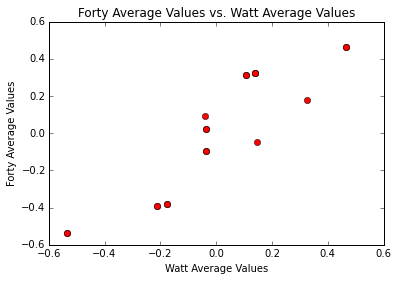

In [21]:
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)
axes.plot(normal_data['FortyAverage'].values, normal_data['WattAverage'].values, 'ro')
axes.set_title("Forty Average Values vs. Watt Average Values")
axes.set_xlabel('Watt Average Values')
axes.set_ylabel('Forty Average Values')

Because these two features are colinear, our previous regression model has a **bias** which could make the model inaccurate. What can we do to remove this bias?

## Regularized Regression

Now that we have found that there are some features that are colinear, we will want to implement a **regularized regression** in order to reduce the number of predictors in our regression model and to reduce the bias.

Two techniques that we will use to perform this regression are **lasso** and **elastic net**. 

## Lasso
**Lasso** is a regression technique that allows you to:
- reduce the number of predictors
- identify important predictors
- select among redundant predictors. 

## Elastic Net
We couple the lasso technique with **elastic net**, specifically because we have highly correlated variables. 

Computing regularization path using the lasso...
Computing regularization path using the elastic net...


(1.3106730482316984,
 3.7086130569037361,
 -0.25705459301977707,
 0.58276016074938664)

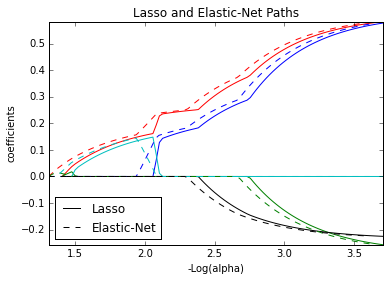

In [29]:
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

x = [normal_data.FortyAverage.values, normal_data.OneAverage.values, \
     normal_data.RepMaxAverage.values, normal_data.WattAverage.values, \
     normal_data.WeightAverage.values]
y = normal_data.Velocity.values

X = numpy.asarray(x)
X = numpy.transpose(X)

Y = numpy.asarray(y)
Y = numpy.transpose(Y)

eps = 5e-3

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, Y, eps, fit_intercept=False)

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-numpy.log10(alphas_lasso), coefs_lasso.T)
l2 = plt.plot(-numpy.log10(alphas_enet), coefs_enet.T, linestyle='--')

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


## Using our new model
With the coefficients of our refined regression model, hopefully we'll be able to better predict the velocity of a given boat of rowers. 

Let's do the same thing as before and make a **new scatter plot** of the actual values vs. the fit values as well as observe the **new R squared value**. 

In [30]:
# grab the new coefficients
forty_coef = coefs_lasso[0][-1]
print "FortyAverage coefficient:", forty_coef
one_coef = coefs_lasso[1][-1]
print "OneAverage coefficient:", one_coef
repmax_coef = coefs_lasso[2][-1]
print "RepMaxAverage coefficient:", repmax_coef
maxwatt_coef = coefs_lasso[3][-1]
print "WattAverage coefficient:", maxwatt_coef
weight_coef = coefs_lasso[4][-1]
print "Weight Average coefficient:", weight_coef 

FortyAverage coefficient: 0.577502550193
OneAverage coefficient: 0.582760160749
RepMaxAverage coefficient: -0.25705459302
WattAverage coefficient: 0.0
Weight Average coefficient: -0.225266670534


The fact that the **OneAverage coefficient** is the highest makes sense because that specific measure is the closest to the pieces performed for the time trials.

## New Scatter Plot

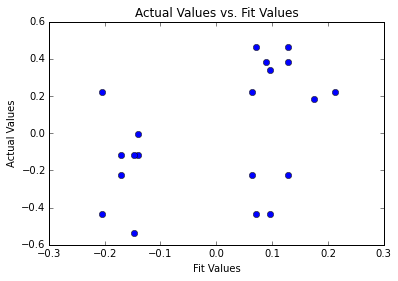

In [31]:
# calculate the predicted values 
# store the predicted values and actual values in respective arrays, then make plot

new_fit_values = []
data_values = []

for nd in normal_data.values:
    
    data_values.append(nd[3])
    
    new_fit_value = nd[0]*forty_coef + \
                nd[1]*one_coef + \
                nd[2]*repmax_coef + \
                nd[4]*maxwatt_coef + \
                nd[5]*weight_coef
                
    new_fit_values.append(new_fit_value)
    
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)
axes.plot(new_fit_values, data_values, 'bo')
axes.set_title('Actual Values vs. Fit Values')
axes.set_xlabel('Fit Values')
axes.set_ylabel('Actual Values')

## Did the values change? 
Let's compare the old fit values vs. the new ones: 

In [32]:
for n in range(0, len(fit_values)):
    print fit_values[n], "vs", new_fit_values[n]
    

0.0957770738468 vs 0.0896881303246
0.222710354385 vs 0.213187785897
0.13430805781 vs 0.128303508707
0.184179370422 vs 0.174572407514
0.13430805781 vs 0.128303508707
0.13430805781 vs 0.128303508707
-0.213929914868 vs -0.204022487763
-0.213929914868 vs -0.204022487763
0.0615620669174 vs 0.0647179495012
0.0615620669174 vs 0.0647179495012
-0.141183923975 vs -0.140436928556
-0.141183923975 vs -0.140436928556
0.0591229459513 vs 0.0708569736819
0.0591229459513 vs 0.0708569736819
-0.138744803009 vs -0.146575952737
-0.138744803009 vs -0.146575952737
0.0933379528806 vs 0.0958271545054
0.0933379528806 vs 0.0958271545054
-0.172959809939 vs -0.171546133561
-0.172959809939 vs -0.171546133561


There doesn't seem to be any significant change. What about the new R squared value?

## New R Squared Value:

Use the **scipy** package to find the R value given two sets of values, the first independent, the second dependent. 

In [33]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data_values, new_fit_values)
print "R squared =", round(r_value**2, 3)

R squared = 0.197


Hmm... looks like the R squared value didn't improve, but we gave it our best shot! What now?

## Constrained Optimization
Let's assume that we trust our model, even though the R squared value might not indicate that it is very accurate. 

We can still use our regression model to **predict** the fastest lineup by iterating through all combinations of 8 rowers from the 17 candidates. The combination of 8 rowers that produces the **fastest velocity** will be the fastest lineup. 

## How many iterations will we have to go through?
Out of 17 rowers, we will choose all combinations of 8. We can use the choose function because order of selection does not matter:

(*The fraction below is actually the choose function- couldn't get it to work in LaTeX*)

$$ \frac{17!}{8!(17-8)!} = \left(\frac{17}{8}\right) = 24310 $$

That's a lot of iterations!


## However, there are a couple of constraints we can consider before we optimize

First, it is important to note that most rowers cannot row on both sides (port and starboard). 
Therefore, we need **4 port rowers** and **4 starboard rowers**.

Second, there is a weight restriction in lightweight rowing. No individual rower can **exceed 160 lbs** and the weight average of the boat must be **less than or equal to 155 lbs**.

In the data set we have been using, there are **9 port side rowers** and **8 starboard side rowers**.
Using this constraint, we can reduce the number of iterations to be the sum of 9 choose 4 and 8 choose 4
(*Once again, the fraction is actually the choose function*) :

$$ \left(\frac{9}{4}\right) + \left(\frac{8}{4}\right) = 196 $$

That's a lot less iterations!

Furthermore, a lineup is only valid if its average weight is less than or equal to 155 lbs. We can ignore the lineups that exceed 155 lbs, so the total number of valid entries is less than 196. 

## Pseudocode
I didn't have time to implement the actual code, but we can take a look at how it would work in theory:

- Array named **ports**: individual information for the **port side rowers** 

- Array named **starboards**: individual information for the **starboard side rowers**

- Set a variable **max_v** to keep track of the **maximum velocity encountered** to 0. 

- Set a respective array **max_rowers** to keep track of the 8 rowers who produce the maximum velocity.

- **Iterate** through the 9 port side rowers choosing 4 each time using a combination of loops:
    - **Iterate** through the 8 starboard side rowers choosing 4 each time using a combination of loops:
        - From the 8 rowers chosen, calculate the **average values** for each of the 5 attributes
        - Use these five attributes to predict a **velocity** using our regression model
        - **IF** the weight average $\leq$ 155 **AND** this velocity $>$ max_v:
            - max_v = this velocity
            - max_rowers = this combination of rowers
            
- return max_rowers to find the 8 rowers that produce the fastest velocity